In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
# import plotly.gragh_object as pgo

# import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

# import folium

In [2]:
com_link = (r"time_series_covid19_confirmed_global.csv")
confirmed = pd.read_csv(com_link)

death_link = ("time_series_covid19_deaths_global.csv")
death = pd.read_csv(death_link)

rec_link = (r"time_series_covid19_recovered_global.csv")
recovered = pd.read_csv(rec_link)

In [3]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [4]:
location = confirmed[['Country/Region', 'Lat', 'Long']]
location 

,Country/Region,Lat,Long
0,Afghanistan,33.939110,67.709953
1,Albania,41.153300,20.168300
2,Algeria,28.033900,1.659600
3,Andorra,42.506300,1.521800
4,Angola,-11.202700,17.873900
...,...,...,...
284,West Bank and Gaza,31.952200,35.233200
285,Winter Olympics 2022,39.904200,116.407400
286,Yemen,15.552727,48.516388
287,Zambia,-13.133897,27.849332


In [5]:
location.isna().sum()

Country/Region    0
Lat               2
Long              2
dtype: int64

In [6]:
locna = location[(location.Lat.isna())]
locna

,Country/Region,Lat,Long
53,Canada,NaN,NaN
89,China,NaN,NaN


In [7]:
location.at[53, 'Lat'] = 56.1304
location.at[53, 'Long'] = -106.3468
location.at[89, 'Lat'] = 35.8617
location.at[89, 'Long'] = 104.1954

In [8]:
location.isna().sum()

Country/Region    0
Lat               0
Long              0
dtype: int64

In [9]:
confirmed_df = confirmed.drop(columns = ['Province/State', 'Lat', 'Long'])
confirmed_df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,Yemen,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,Zambia,0,0,0,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [10]:
confirmed_d = confirmed_df.groupby(by = 'Country/Region').aggregate(np.sum).T
confirmed_d

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/5/23,209390,334427,271477,47875,105277,11,9106,10044125,446819,11385534,...,1034303,251071,12014,552051,11526966,703228,535,11945,343135,264127
3/6/23,209406,334427,271477,47875,105277,11,9106,10044957,446819,11385534,...,1034303,251071,12014,552125,11526966,703228,535,11945,343135,264127
3/7/23,209436,334427,271490,47875,105277,11,9106,10044957,446819,11385534,...,1034303,251071,12014,552157,11526986,703228,535,11945,343135,264127
3/8/23,209451,334443,271494,47890,105288,11,9106,10044957,447308,11385534,...,1034303,251247,12014,552157,11526994,703228,535,11945,343135,264276


In [11]:
confirmed_d.index.name = 'Date'
confirmed_d = confirmed_d.reset_index()

confirmed_d

Country/Region,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,3/5/23,209390,334427,271477,47875,105277,11,9106,10044125,446819,...,1034303,251071,12014,552051,11526966,703228,535,11945,343135,264127
1139,3/6/23,209406,334427,271477,47875,105277,11,9106,10044957,446819,...,1034303,251071,12014,552125,11526966,703228,535,11945,343135,264127
1140,3/7/23,209436,334427,271490,47875,105277,11,9106,10044957,446819,...,1034303,251071,12014,552157,11526986,703228,535,11945,343135,264127
1141,3/8/23,209451,334443,271494,47890,105288,11,9106,10044957,447308,...,1034303,251247,12014,552157,11526994,703228,535,11945,343135,264276


In [12]:
confirm = confirmed_d.melt(id_vars = 'Date', value_name = 'Confirmed_cases').copy()
confirm

,Date,Country/Region,Confirmed_cases
0,1/22/20,Afghanistan,0
1,1/23/20,Afghanistan,0
2,1/24/20,Afghanistan,0
3,1/25/20,Afghanistan,0
4,1/26/20,Afghanistan,0
...,...,...,...
229738,3/5/23,Zimbabwe,264127
229739,3/6/23,Zimbabwe,264127
229740,3/7/23,Zimbabwe,264127
229741,3/8/23,Zimbabwe,264276


In [13]:
confirm['Date'] = pd.to_datetime(confirm.Date)
confirm

,Date,Country/Region,Confirmed_cases
0,2020-01-22,Afghanistan,0
1,2020-01-23,Afghanistan,0
2,2020-01-24,Afghanistan,0
3,2020-01-25,Afghanistan,0
4,2020-01-26,Afghanistan,0
...,...,...,...
229738,2023-03-05,Zimbabwe,264127
229739,2023-03-06,Zimbabwe,264127
229740,2023-03-07,Zimbabwe,264127
229741,2023-03-08,Zimbabwe,264276


# I want to get the number of cases per day

>**The Values in the '<font color = red>*Confirmed_cases*</font>' column is not on real daily cases, rather on accumulated cases, meaning the daily cases are being added to the value of the preceeding day and this will not give a good result in any shape or form at all**

I'm going to write the program cell by cell to track the progress and outcomes

In [14]:
# I want to get the numnber of cases per day so let me start with the confirm dataframe

df = confirm.copy()
df

,Date,Country/Region,Confirmed_cases
0,2020-01-22,Afghanistan,0
1,2020-01-23,Afghanistan,0
2,2020-01-24,Afghanistan,0
3,2020-01-25,Afghanistan,0
4,2020-01-26,Afghanistan,0
...,...,...,...
229738,2023-03-05,Zimbabwe,264127
229739,2023-03-06,Zimbabwe,264127
229740,2023-03-07,Zimbabwe,264127
229741,2023-03-08,Zimbabwe,264276


In [15]:
# The diff() method, gives me exactly the difference between the previous day and the next day
# which tells exactly the daily cases

df['Confirmed_Cases'] = df.Confirmed_cases.diff()
df

,Date,Country/Region,Confirmed_cases,Confirmed_Cases
0,2020-01-22,Afghanistan,0,NaN
1,2020-01-23,Afghanistan,0,0.0
2,2020-01-24,Afghanistan,0,0.0
3,2020-01-25,Afghanistan,0,0.0
4,2020-01-26,Afghanistan,0,0.0
...,...,...,...,...
229738,2023-03-05,Zimbabwe,264127,0.0
229739,2023-03-06,Zimbabwe,264127,0.0
229740,2023-03-07,Zimbabwe,264127,0.0
229741,2023-03-08,Zimbabwe,264276,149.0


In [16]:
df.Confirmed_Cases.sum()

264276.0

In [17]:
df.isna().sum()

Date               0
Country/Region     0
Confirmed_cases    0
Confirmed_Cases    1
dtype: int64

In [18]:
nig = df[df['Country/Region'] == 'Nigeria']
nig

,Date,Country/Region,Confirmed_cases,Confirmed_Cases
150876,2020-01-22,Nigeria,0,-9508.0
150877,2020-01-23,Nigeria,0,0.0
150878,2020-01-24,Nigeria,0,0.0
150879,2020-01-25,Nigeria,0,0.0
150880,2020-01-26,Nigeria,0,0.0
...,...,...,...,...
152014,2023-03-05,Nigeria,266598,0.0
152015,2023-03-06,Nigeria,266598,0.0
152016,2023-03-07,Nigeria,266598,0.0
152017,2023-03-08,Nigeria,266598,0.0


### At this point, i realized that the value of daily cases of whatever previous country spanned into Nigeria and that will be the case for the many countries in this dataframe, therefore i have to isolate each country in order to achieve a perfect result of daily cases in indidual countries

In [19]:
# I'm going to start by making a copy of my dataframe just in case i mess things up, I can always try again with my main dataframe

df2 = confirm.copy()

In [20]:
# I disintegrate the entire dataframe into different countries

countries = df2.groupby('Country/Region')

In [21]:
# I created a series having the differeence of each row and its previous for each disintegrate

dailies = countries.Confirmed_cases.diff()
dailies

0           NaN
1           0.0
2           0.0
3           0.0
4           0.0
          ...  
229738      0.0
229739      0.0
229740      0.0
229741    149.0
229742      0.0
Name: Confirmed_cases, Length: 229743, dtype: float64

In [22]:
dailies.sum()

676569592.0

In [23]:
# Check if there is a negative value in the series
dailies[dailies<0]

58        -2.0
712       -6.0
1109     -48.0
7021      -1.0
7331      -1.0
          ... 
218394   -21.0
221511    -7.0
221518    -6.0
226516    -1.0
228701    -6.0
Name: Confirmed_cases, Length: 171, dtype: float64

In [24]:
# replace all negative values with 0

dailies[dailies<0] = 0

In [25]:
dailies[dailies<0]

Series([], Name: Confirmed_cases, dtype: float64)

In [26]:
dailies.sum()

677420921.0

In [27]:
# Checking the series on the Nigerian axis
dailies.loc[nig.index]

150876    NaN
150877    0.0
150878    0.0
150879    0.0
150880    0.0
         ... 
152014    0.0
152015    0.0
152016    0.0
152017    0.0
152018    0.0
Name: Confirmed_cases, Length: 1143, dtype: float64

In [28]:
# Getting the Nigerian group from the disintegrations

countries.get_group('Nigeria')

,Date,Country/Region,Confirmed_cases
150876,2020-01-22,Nigeria,0
150877,2020-01-23,Nigeria,0
150878,2020-01-24,Nigeria,0
150879,2020-01-25,Nigeria,0
150880,2020-01-26,Nigeria,0
...,...,...,...
152014,2023-03-05,Nigeria,266598
152015,2023-03-06,Nigeria,266598
152016,2023-03-07,Nigeria,266598
152017,2023-03-08,Nigeria,266598


In [29]:
# Merging the series with the main dataframe, let's see our end result

df2['Confirmed_Cases'] = dailies
df2

,Date,Country/Region,Confirmed_cases,Confirmed_Cases
0,2020-01-22,Afghanistan,0,NaN
1,2020-01-23,Afghanistan,0,0.0
2,2020-01-24,Afghanistan,0,0.0
3,2020-01-25,Afghanistan,0,0.0
4,2020-01-26,Afghanistan,0,0.0
...,...,...,...,...
229738,2023-03-05,Zimbabwe,264127,0.0
229739,2023-03-06,Zimbabwe,264127,0.0
229740,2023-03-07,Zimbabwe,264127,0.0
229741,2023-03-08,Zimbabwe,264276,149.0


In [30]:
df2.Confirmed_Cases.sum()

677420921.0

In [31]:
df2[df2['Country/Region'] == 'Zimbabwe']

,Date,Country/Region,Confirmed_cases,Confirmed_Cases
228600,2020-01-22,Zimbabwe,0,NaN
228601,2020-01-23,Zimbabwe,0,0.0
228602,2020-01-24,Zimbabwe,0,0.0
228603,2020-01-25,Zimbabwe,0,0.0
228604,2020-01-26,Zimbabwe,0,0.0
...,...,...,...,...
229738,2023-03-05,Zimbabwe,264127,0.0
229739,2023-03-06,Zimbabwe,264127,0.0
229740,2023-03-07,Zimbabwe,264127,0.0
229741,2023-03-08,Zimbabwe,264276,149.0


In [32]:
countries.get_group('Zimbabwe')

,Date,Country/Region,Confirmed_cases,Confirmed_Cases
228600,2020-01-22,Zimbabwe,0,NaN
228601,2020-01-23,Zimbabwe,0,0.0
228602,2020-01-24,Zimbabwe,0,0.0
228603,2020-01-25,Zimbabwe,0,0.0
228604,2020-01-26,Zimbabwe,0,0.0
...,...,...,...,...
229738,2023-03-05,Zimbabwe,264127,0.0
229739,2023-03-06,Zimbabwe,264127,0.0
229740,2023-03-07,Zimbabwe,264127,0.0
229741,2023-03-08,Zimbabwe,264276,149.0


In [33]:
countries.get_group('Nigeria')

,Date,Country/Region,Confirmed_cases,Confirmed_Cases
150876,2020-01-22,Nigeria,0,NaN
150877,2020-01-23,Nigeria,0,0.0
150878,2020-01-24,Nigeria,0,0.0
150879,2020-01-25,Nigeria,0,0.0
150880,2020-01-26,Nigeria,0,0.0
...,...,...,...,...
152014,2023-03-05,Nigeria,266598,0.0
152015,2023-03-06,Nigeria,266598,0.0
152016,2023-03-07,Nigeria,266598,0.0
152017,2023-03-08,Nigeria,266598,0.0


In [34]:
df2[df2['Country/Region'] == 'Nigeria']

,Date,Country/Region,Confirmed_cases,Confirmed_Cases
150876,2020-01-22,Nigeria,0,NaN
150877,2020-01-23,Nigeria,0,0.0
150878,2020-01-24,Nigeria,0,0.0
150879,2020-01-25,Nigeria,0,0.0
150880,2020-01-26,Nigeria,0,0.0
...,...,...,...,...
152014,2023-03-05,Nigeria,266598,0.0
152015,2023-03-06,Nigeria,266598,0.0
152016,2023-03-07,Nigeria,266598,0.0
152017,2023-03-08,Nigeria,266598,0.0


In [35]:
df2.head(117770)

,Date,Country/Region,Confirmed_cases,Confirmed_Cases
0,2020-01-22,Afghanistan,0,NaN
1,2020-01-23,Afghanistan,0,0.0
2,2020-01-24,Afghanistan,0,0.0
3,2020-01-25,Afghanistan,0,0.0
4,2020-01-26,Afghanistan,0,0.0
...,...,...,...,...
117765,2020-02-27,Libya,0,0.0
117766,2020-02-28,Libya,0,0.0
117767,2020-02-29,Libya,0,0.0
117768,2020-03-01,Libya,0,0.0


### so now, we see that the Niger difference didn't enter the Nigerian space and I believe it's same for all countries

In [36]:
df2.isna().sum()

Date                 0
Country/Region       0
Confirmed_cases      0
Confirmed_Cases    201
dtype: int64

In [37]:
df2['Country/Region'].nunique()

201

***the number of NANs in my new dataframe is the same as the number of the countries in the dataframe👍👍👍. We are good to go***

Which means each beginning of the country has a NAN in the difference computation

In [38]:
df2.fillna(0, inplace= True)

In [39]:
df2.Confirmed_Cases.sum()

677420921.0

In [40]:
# To do same for the rest of the dataframe, I will write all in one cell

In [41]:
death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [42]:
deaths = death.drop(columns = ['Province/State', 'Lat', 'Long'])

death_df = deaths.groupby('Country/Region').aggregate(np.sum).T

death_df.index.name = 'Date'
death_d = death_df.reset_index()

death_case = death_d.melt(id_vars = 'Date', value_name = 'Confirmed_deaths').copy()

death_case.Date = pd.to_datetime(death_case.Date)

death_case

,Date,Country/Region,Confirmed_deaths
0,2020-01-22,Afghanistan,0
1,2020-01-23,Afghanistan,0
2,2020-01-24,Afghanistan,0
3,2020-01-25,Afghanistan,0
4,2020-01-26,Afghanistan,0
...,...,...,...
229738,2023-03-05,Zimbabwe,5668
229739,2023-03-06,Zimbabwe,5668
229740,2023-03-07,Zimbabwe,5668
229741,2023-03-08,Zimbabwe,5671


In [43]:
d_countries = death_case.groupby('Country/Region')

d_dailies = d_countries.Confirmed_deaths.diff()

d_dailies[d_dailies < 0] = 0

death_case['Death_Cases'] = d_dailies

death_df = death_case.fillna(0)

death_df
    

,Date,Country/Region,Confirmed_deaths,Death_Cases
0,2020-01-22,Afghanistan,0,0.0
1,2020-01-23,Afghanistan,0,0.0
2,2020-01-24,Afghanistan,0,0.0
3,2020-01-25,Afghanistan,0,0.0
4,2020-01-26,Afghanistan,0,0.0
...,...,...,...,...
229738,2023-03-05,Zimbabwe,5668,0.0
229739,2023-03-06,Zimbabwe,5668,0.0
229740,2023-03-07,Zimbabwe,5668,0.0
229741,2023-03-08,Zimbabwe,5671,3.0


In [44]:
death_df.Death_Cases.sum()

6889464.0

In [45]:
recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
def reset(x):
    s = x.drop(columns = ['Province/State', 'Lat', 'Long'])

    d = s.groupby('Country/Region').aggregate(np.sum).T

    d.index.name = 'Date'
    h = d.reset_index()

    e = h.melt(id_vars = 'Date', value_name = 'Recovered_cases').copy()

    e.Date = pd.to_datetime(e.Date)

    return e

In [47]:
recovered_cases = reset(recovered)
recovered_cases

,Date,Country/Region,Recovered_cases
0,2020-01-22,Afghanistan,0
1,2020-01-23,Afghanistan,0
2,2020-01-24,Afghanistan,0
3,2020-01-25,Afghanistan,0
4,2020-01-26,Afghanistan,0
...,...,...,...
229738,2023-03-05,Zimbabwe,0
229739,2023-03-06,Zimbabwe,0
229740,2023-03-07,Zimbabwe,0
229741,2023-03-08,Zimbabwe,0


In [48]:
#pd.options.display.max_columns

rec_countries = recovered_cases.groupby('Country/Region')

r_dailies = rec_countries.Recovered_cases.diff()

r_dailies[r_dailies < 0] = 0

recovered_cases['Recovered_Cases'] = r_dailies

rec_df = recovered_cases.fillna(0)

rec_df

,Date,Country/Region,Recovered_cases,Recovered_Cases
0,2020-01-22,Afghanistan,0,0.0
1,2020-01-23,Afghanistan,0,0.0
2,2020-01-24,Afghanistan,0,0.0
3,2020-01-25,Afghanistan,0,0.0
4,2020-01-26,Afghanistan,0,0.0
...,...,...,...,...
229738,2023-03-05,Zimbabwe,0,0.0
229739,2023-03-06,Zimbabwe,0,0.0
229740,2023-03-07,Zimbabwe,0,0.0
229741,2023-03-08,Zimbabwe,0,0.0


In [49]:
r_dailies.isna().sum()

201

In [50]:
s = r_dailies[r_dailies < 0]
s

Series([], Name: Recovered_cases, dtype: float64)

In [51]:
rec_df[rec_df.Recovered_Cases < 0]

,Date,Country/Region,Recovered_cases,Recovered_Cases


In [52]:
rec_df.Recovered_Cases.sum()

137534186.0

In [53]:
location['Country/Region'].nunique()

201

In [54]:
df2['Country/Region'].nunique()

201

In [55]:
rec_df['Country/Region'].nunique()

201

In [56]:
death_df['Country/Region'].nunique()

201

In [57]:
df2.Date.nunique()

1143

In [58]:
rec_df.Date.nunique()

1143

In [59]:
death_df.Date.nunique()

1143

In [60]:
df2.merge(death_df)

,Date,Country/Region,Confirmed_cases,Confirmed_Cases,Confirmed_deaths,Death_Cases
0,2020-01-22,Afghanistan,0,0.0,0,0.0
1,2020-01-23,Afghanistan,0,0.0,0,0.0
2,2020-01-24,Afghanistan,0,0.0,0,0.0
3,2020-01-25,Afghanistan,0,0.0,0,0.0
4,2020-01-26,Afghanistan,0,0.0,0,0.0
...,...,...,...,...,...,...
229738,2023-03-05,Zimbabwe,264127,0.0,5668,0.0
229739,2023-03-06,Zimbabwe,264127,0.0,5668,0.0
229740,2023-03-07,Zimbabwe,264127,0.0,5668,0.0
229741,2023-03-08,Zimbabwe,264276,149.0,5671,3.0


In [61]:
df2

,Date,Country/Region,Confirmed_cases,Confirmed_Cases
0,2020-01-22,Afghanistan,0,0.0
1,2020-01-23,Afghanistan,0,0.0
2,2020-01-24,Afghanistan,0,0.0
3,2020-01-25,Afghanistan,0,0.0
4,2020-01-26,Afghanistan,0,0.0
...,...,...,...,...
229738,2023-03-05,Zimbabwe,264127,0.0
229739,2023-03-06,Zimbabwe,264127,0.0
229740,2023-03-07,Zimbabwe,264127,0.0
229741,2023-03-08,Zimbabwe,264276,149.0


In [62]:
covid_df = pd.merge(df2, death_df, on = ['Date', 'Country/Region']).merge(rec_df, on = ['Date', 'Country/Region'])

covid_df

,Date,Country/Region,Confirmed_cases,Confirmed_Cases,Confirmed_deaths,Death_Cases,Recovered_cases,Recovered_Cases
0,2020-01-22,Afghanistan,0,0.0,0,0.0,0,0.0
1,2020-01-23,Afghanistan,0,0.0,0,0.0,0,0.0
2,2020-01-24,Afghanistan,0,0.0,0,0.0,0,0.0
3,2020-01-25,Afghanistan,0,0.0,0,0.0,0,0.0
4,2020-01-26,Afghanistan,0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...
229738,2023-03-05,Zimbabwe,264127,0.0,5668,0.0,0,0.0
229739,2023-03-06,Zimbabwe,264127,0.0,5668,0.0,0,0.0
229740,2023-03-07,Zimbabwe,264127,0.0,5668,0.0,0,0.0
229741,2023-03-08,Zimbabwe,264276,149.0,5671,3.0,0,0.0


In [63]:
# covid = covid_df.join(location.set_index(['Country/Region']), on = ['Country/Region'])
# covid

# covid_data = pd.merge(covid_df, location, on = ['Country/Region'])
# covid_data

covid_df.rename(columns={'Country/Region': 'Country'}, inplace=True)

covid = covid_df[['Date', 'Country', 'Confirmed_Cases', 'Death_Cases', 'Recovered_Cases']]
covid

,Date,Country,Confirmed_Cases,Death_Cases,Recovered_Cases
0,2020-01-22,Afghanistan,0.0,0.0,0.0
1,2020-01-23,Afghanistan,0.0,0.0,0.0
2,2020-01-24,Afghanistan,0.0,0.0,0.0
3,2020-01-25,Afghanistan,0.0,0.0,0.0
4,2020-01-26,Afghanistan,0.0,0.0,0.0
...,...,...,...,...,...
229738,2023-03-05,Zimbabwe,0.0,0.0,0.0
229739,2023-03-06,Zimbabwe,0.0,0.0,0.0
229740,2023-03-07,Zimbabwe,0.0,0.0,0.0
229741,2023-03-08,Zimbabwe,149.0,3.0,0.0


In [64]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229743 entries, 0 to 229742
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             229743 non-null  datetime64[ns]
 1   Country          229743 non-null  object        
 2   Confirmed_Cases  229743 non-null  float64       
 3   Death_Cases      229743 non-null  float64       
 4   Recovered_Cases  229743 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 10.5+ MB


In [65]:
covid.isna().sum()

Date               0
Country            0
Confirmed_Cases    0
Death_Cases        0
Recovered_Cases    0
dtype: int64

***Now Our data is set and pure, let's have some fun with this data***

In [78]:
covid.Confirmed_Cases.sum()

555229664.0

In [79]:
covid.Recovered_Cases.sum()

137534185.0

In [66]:
covid.to_csv(r"C:\Users\Chisom\Documents\PBIData\My Cleaned Covid.csv", index=False)

# location.to_csv('Covid_Location.csv', index=False)

This is my aim, now I export the data to do the rest of the visuals on Power BI

See You Later Guys!

## ✍️✍️✍️ Chisom Ohachu



In [67]:
covid['Year'] = covid.Date.dt.year
covid['Month'] = covid.Date.dt.month_name()
covid['Day'] = covid.Date.dt.day_name()
covid

C:\Users\Chisom\AppData\Local\Temp\ipykernel_1656\1172776863.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Chisom\AppData\Local\Temp\ipykernel_1656\1172776863.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Country,Confirmed_Cases,Death_Cases,Recovered_Cases,Year,Month,Day
0,2020-01-22,Afghanistan,0.0,0.0,0.0,2020,January,Wednesday
1,2020-01-23,Afghanistan,0.0,0.0,0.0,2020,January,Thursday
2,2020-01-24,Afghanistan,0.0,0.0,0.0,2020,January,Friday
3,2020-01-25,Afghanistan,0.0,0.0,0.0,2020,January,Saturday
4,2020-01-26,Afghanistan,0.0,0.0,0.0,2020,January,Sunday
...,...,...,...,...,...,...,...,...
229738,2023-03-05,Zimbabwe,0.0,0.0,0.0,2023,March,Sunday
229739,2023-03-06,Zimbabwe,0.0,0.0,0.0,2023,March,Monday
229740,2023-03-07,Zimbabwe,0.0,0.0,0.0,2023,March,Tuesday
229741,2023-03-08,Zimbabwe,149.0,3.0,0.0,2023,March,Wednesday


In [68]:
covid.pivot_table(values=['Confirmed_Cases', 'Death_Cases', 'Recovered_Cases'], index='Year', aggfunc=np.sum)

,Confirmed_Cases,Death_Cases,Recovered_Cases
Year,,,
2020,83896425.0,1905065.0,53629753.0
2021,205449700.0,3568659.0,83904432.0
2022,371951626.0,1227029.0,1.0
2023,16123170.0,188711.0,0.0


<AxesSubplot:xlabel='Year'>

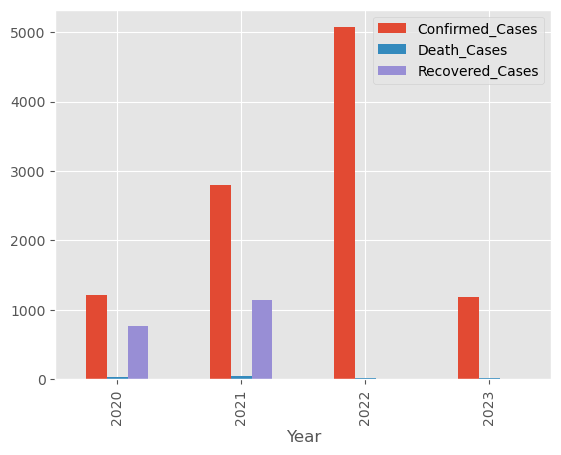

In [69]:
covid.pivot_table(values=['Confirmed_Cases', 'Death_Cases', 'Recovered_Cases'], index='Year').plot(kind = 'bar')

In [70]:
covid.corr()

,Confirmed_Cases,Death_Cases,Recovered_Cases,Year
Confirmed_Cases,1.000000,0.415663,0.281602,0.060572
Death_Cases,0.415663,1.000000,0.398860,-0.028904
Recovered_Cases,0.281602,0.398860,1.000000,-0.054734
Year,0.060572,-0.028904,-0.054734,1.000000


In [71]:
covid.describe()

,Confirmed_Cases,Death_Cases,Recovered_Cases,Year
count,2.297430e+05,229743.000000,2.297430e+05,229743.000000
mean,2.948603e+03,29.987699,5.986436e+02,2021.136483
std,1.785890e+04,203.830153,6.280163e+03,0.916798
min,0.000000e+00,0.000000,0.000000e+00,2020.000000
25%,0.000000e+00,0.000000,0.000000e+00,2020.000000
50%,2.300000e+01,0.000000,0.000000e+00,2021.000000
75%,5.520000e+02,6.000000,5.000000e+00,2022.000000
max,1.354505e+06,59961.000000,1.123456e+06,2023.000000


In [72]:
covid.pivot_table(values=['Confirmed_Cases', 'Death_Cases', 'Recovered_Cases'], 
                  index= 'Country', aggfunc= np.sum)

,Confirmed_Cases,Death_Cases,Recovered_Cases
Country,,,
Afghanistan,209507.0,7896.0,82614.0
Albania,334457.0,3598.0,130314.0
Algeria,271496.0,6881.0,118523.0
Andorra,47890.0,167.0,14382.0
Angola,105288.0,1936.0,39889.0
...,...,...,...
West Bank and Gaza,703228.0,5708.0,312333.0
Winter Olympics 2022,535.0,0.0,0.0
Yemen,11946.0,2159.0,4251.0
